# Libraries

In [13]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import iqr

# Data layout

**data**: all of the data needed for the plots is included in the folder **data**.

- **learning**: learning metrics data (loss and accuracy over epochs).

    - **loss**: training and validation loss data.

        - **train**: training loss data.

            - **GregNet.txt**: training loss of GregNet.

- **probabilities**

    - **GregNet.txt**: text file that includes 3 columns, separated by ": ", in 5 stages, separated by a line with "Folder {i}" where i goes from 0 to 4.
        - *Column 1*: ground truth class.
        - *Column 2*: probability predicted by GregNet.
        - *Column 3*: PISNR of the sample.

In [16]:
n_folders = 5

probabilities_GregNet = "data/probabilities/GregNet.txt"
training_loss_train_GregNet = "data/training/loss/train/GregNet.txt"

# Data plots

**Figure 3.3**: Distribution of PISNR of the test subset for each of the data sets:

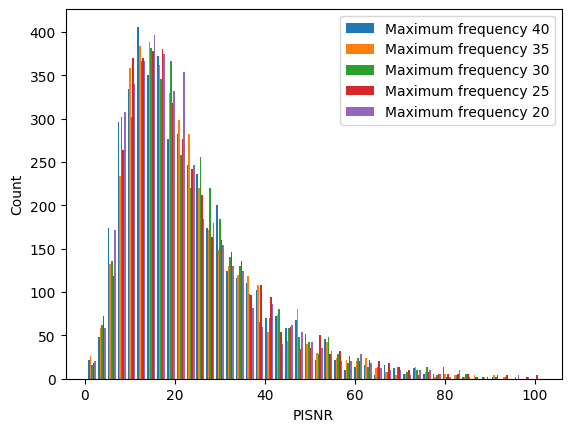

In [17]:
# irrelevant which model is used for this plot, since it only takes the PISNR stats

with open(filename_probabilities_GregNet, "r") as f:
    lines = f.readlines()

pisnr = []
tmp_pisnr = []

for line in lines:
    if "Folder" in line:
        if tmp_pisnr:
            pisnr.append(tmp_pisnr)
            tmp_pisnr = []
    else:
        tmp_pisnr.append(float(line.split(": ")[2]))

pisnr.append(tmp_pisnr)

h = []
n_bins = []

for i in range(len(pisnr)):
    h.append(2 * iqr(pisnr[i]) / (len(pisnr[i]) ** (1 / 3)))
    n_bins.append(int((max(pisnr[i]) - min(pisnr[i])) / h[i]))

plt.hist([pisnr[i] for i in range(len(pisnr))], bins = int(np.mean(n_bins)), label=["Maximum frequency 40", "Maximum frequency 35", "Maximum frequency 30", "Maximum frequency 25", "Maximum frequency 20"])
plt.xlabel("PISNR")
plt.ylabel("Count")
plt.legend(loc="best")
plt.show()

**Figure 4.1**: Training and validation losses over number of epochs for (a) GregNet and (b) GWaveNet, with the corresponding 3σ error for each. The burgundy dashed lines signal the end of a curriculum learning stage, with more data from a new data set being added after them. The solid brown short lines signal the best-performing epoch in each stage.

In [ ]:
with open(filename_learning_loss_train_GregNet, "r") as f:
    lines = f.readlines()

train_loss = {f"folder {i}": [] for i in range(n_folders)}
train_loss_stdev = {f"folder {i}": [] for i in range(n_folders)}

for line in lines:
    if "Folder" in line:
        current_folder = line.split(" ")[1]
    else:
        train_loss[f"folder {current_folder}"].append(float(line.split(", ")[0][7:-2]))